In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Crop_Data.csv')

In [3]:
df.shape

(214471, 25)

In [4]:
df.columns

Index(['State', 'District', 'Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max',
       'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above', 'Precipitation', 'Solar_Radiation',
       'Surface_Pressure', 'Humidity', 'Temp_Max', 'Temp_Min',
       'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
df_ground_water = df[['GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above']].drop_duplicates()

In [17]:
silhouette_scores = []
inertia_scores = []
k_range = range(2, 20)
for k in k_range:
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(df_ground_water)
    preds = clusterer.predict(df_ground_water)
    centers = clusterer.cluster_centers_
    inertia_scores.append(clusterer.inertia_)
    silhouette_scores.append(silhouette_score(df_ground_water, preds))

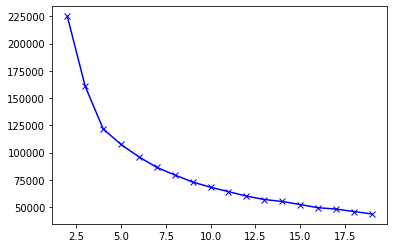

In [18]:
# Inertia vs k
plt.plot(k_range, inertia_scores, 'bx-')

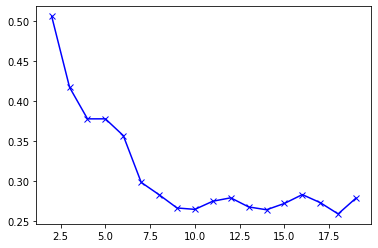

In [19]:
# Plot Silhoutte scores vs k
plt.plot(k_range, silhouette_scores, 'bx-')

In [20]:
# Assuming k = 4
clusterer_4 = KMeans(n_clusters=4)
clusterer_4.fit(df_ground_water)

KMeans(n_clusters=4)

In [21]:
df['GW_Level_Type'] = clusterer_4.predict(df[['GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above']])

<AxesSubplot:xlabel='GW_Level_Type', ylabel='count'>

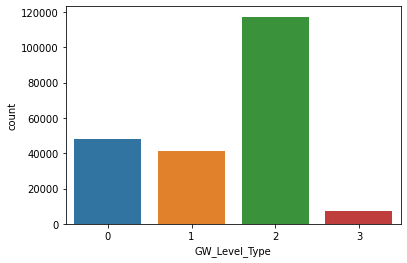

In [28]:
sns.countplot(x='GW_Level_Type', data=df)

<AxesSubplot:xlabel='GW_Level_Type', ylabel='GW_depth_Min'>

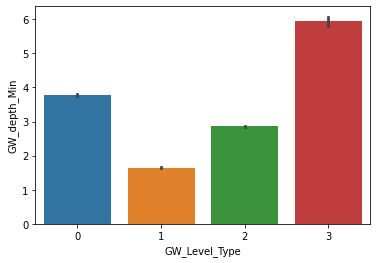

In [30]:
sns.barplot(x='GW_Level_Type', y='GW_depth_Min', data=df)

<AxesSubplot:xlabel='GW_Level_Type', ylabel='GW_depth_Max'>

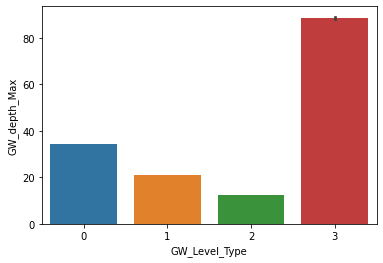

In [31]:
sns.barplot(x='GW_Level_Type', y='GW_depth_Max', data=df)

<AxesSubplot:xlabel='GW_depth_Max', ylabel='GW_depth_Min'>

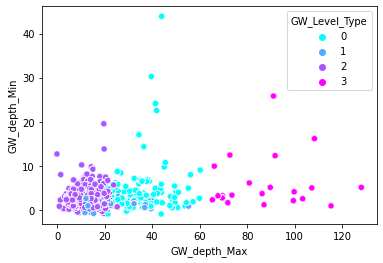

In [37]:
sns.scatterplot(x='GW_depth_Max', y='GW_depth_Min', data=df, hue='GW_Level_Type', palette='cool')

<AxesSubplot:xlabel='Long', ylabel='Lat'>

/home/animathur/anaconda3/envs/py3-TF2/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


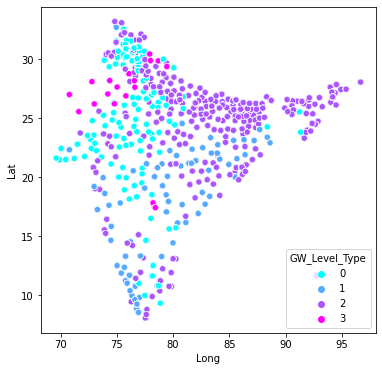

In [27]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Long', y='Lat', data=df, hue='GW_Level_Type', palette='cool')

In [33]:
df.loc[df['GW_Level_Type'] == 3]['State'].unique()

array(['HARYANA', 'RAJASTHAN', 'TAMIL NADU', 'TELANGANA', 'UTTARAKHAND'],
      dtype=object)